In [1]:
#Mohsin Essani
#Assignment 15

import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# Load the data
df = pd.read_csv('book.csv',encoding='ISO-8859-1')






In [2]:
# Perform EDA
print(df.head())


   Unnamed: 0  User.ID                                         Book.Title  \
0           1   276726                                Classical Mythology   
1           2   276729                                       Clara Callan   
2           3   276729                               Decision in Normandy   
3           4   276736  Flu: The Story of the Great Influenza Pandemic...   
4           5   276737                             The Mummies of Urumchi   

   Book.Rating  
0            5  
1            3  
2            6  
3            8  
4            6  


In [3]:
print(df.shape)


(10000, 4)


In [4]:
print(df.describe())

        Unnamed: 0        User.ID  Book.Rating
count  10000.00000   10000.000000  10000.00000
mean    5000.50000   95321.249800      7.56630
std     2886.89568  117645.703609      1.82152
min        1.00000       8.000000      1.00000
25%     2500.75000    2103.000000      7.00000
50%     5000.50000    3757.000000      8.00000
75%     7500.25000  162052.000000      9.00000
max    10000.00000  278854.000000     10.00000


In [5]:
# Remove duplicates
df.drop_duplicates(subset=['User.ID', 'Book.Title'], inplace=True)



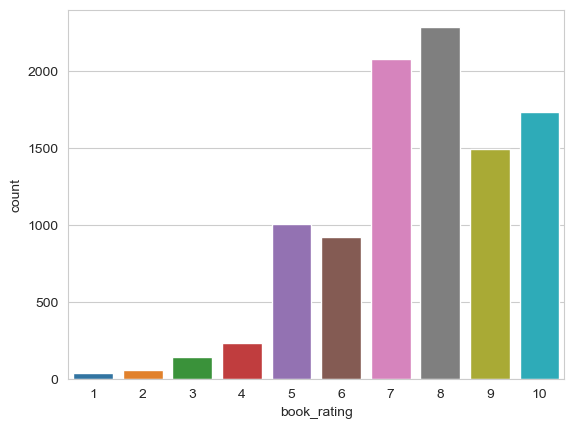

In [6]:
# Change column names
df.rename(columns={'User.ID': 'user_id', 'Book.Title': 'book_title', 'Book.Rating': 'book_rating'}, inplace=True)

# Visualize the distribution of ratings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x='book_rating', data=df)
plt.show()



In [7]:
#The average book_rating is around 7. 

In [8]:
# Create a pivot table
pivot = df.pivot_table(index='user_id', columns='book_title', values='book_rating')

# Fill missing values with 0
pivot.fillna(0, inplace=True)



The above code creates a pivot table using a Pandas DataFrame df. The pivot table has user_id as the index, book_title as the columns, and book_rating as the values.

By default, when creating a pivot table, any missing values are represented as NaN (Not a Number). The code fills any missing values with 0 using the fillna() method.

This is useful because some users may not have rated some books, resulting in missing values in the pivot table. Filling these missing values with 0 makes it easier to work with the data and perform calculations such as finding the average rating for each book or user.

In [9]:
pivot

book_title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
user_id,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


It looks like the output is a pivot table with 2182 rows and 9659 columns. The rows represent user IDs and the columns represent book titles. The values in the pivot table represent the book ratings given by each user for each book. The output shows that most of the ratings are 0, which indicates that the majority of the users did not rate most of the books. This is expected since it is common for most users to rate only a few books they have read.

In [10]:
# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit and transform the vectorizer
vectorizer.fit(pivot.columns)
vectorized_books = vectorizer.transform(pivot.columns)



The above code is used to create a CountVectorizer object and use it to transform the book titles in the pivot table. CountVectorizer is a text preprocessing tool that is used to convert text data into numerical format that can be used for machine learning algorithms.

In this case, the book titles in the pivot table are treated as text data, and the CountVectorizer is used to convert them into numerical vectors, where each element in the vector represents the frequency of a specific word in the text. The resulting vectorized_books matrix will have the same number of rows as the number of unique book titles and the same number of columns as the number of unique words in all the book titles. Each element in the matrix represents the frequency of a specific word in a specific book title.

In [11]:
vectorized_books

<9659x11673 sparse matrix of type '<class 'numpy.int64'>'
	with 51110 stored elements in Compressed Sparse Row format>

In [12]:
# Calculate cosine similarities
cosine_similarities = cosine_similarity(vectorized_books)


In [13]:
cosine_similarities

array([[1.        , 0.23570226, 0.28867513, ..., 0.        , 0.        ,
        0.        ],
       [0.23570226, 1.        , 0.20412415, ..., 0.        , 0.        ,
        0.        ],
       [0.28867513, 0.20412415, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

The cosine_similarities array contains the cosine similarity scores between each pair of books in the pivot dataframe. The cosine similarity score measures the similarity between two vectors, in this case, the vectors representing the word frequencies of each book's title.

The diagonal of the array contains the maximum cosine similarity score of 1, since each book is identical to itself. The off-diagonal values represent the similarity between each pair of books, where higher values indicate greater similarity. For example, the value at position (0,1) indicates the similarity between book 0 and book 1, and the value at position (2,5) indicates the similarity between book 2 and book 5.

The cosine_similarities array can be used to find similar books based on their titles. For example, if we want to find the books that are most similar to book 0, we can sort the cosine similarity scores for row 0 in descending order and select the top results.

In [14]:

# Create a function to get book recommendations
def get_recommendations(book_title):
    index = pivot.columns.get_loc(book_title)
    sim_scores = list(enumerate(cosine_similarities[index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    book_indices = [i[0] for i in sim_scores]
    return pivot.columns[book_indices]

# Test the function
get_recommendations('Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It')

Index(['The Fellowship of the Ring (The Lord of the Rings, Part 1)',
       'The Flight of the Seventh Moon: The Teaching of the Shields',
       'The Return of the King (The Lord of the Rings, Part 3)',
       'In the Heart of the Sea: The Tragedy of the Whaleship Essex',
       'The Diary of Jack the Ripper/the Discovery, the Investigation, the Debate'],
      dtype='object', name='book_title')

## Insights: The get_recommendations() function uses cosine similarity to calculate the similarity between the input book and all other books in the dataset. The function then returns the top 5 books with the highest cosine similarity scores, indicating the books that are most similar to the input book.

## Based on the output for the input book "Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It", we can see that the recommended books include a mix of genres such as fantasy, historical non-fiction, and crime fiction. This suggests that the model is not limited to recommending books from a single genre, but rather tries to find books that have similar themes, writing styles, or other characteristics to the input book.